# Understanding Over & Underfitting
## Predicting Boston Housing Prices

## Getting Started
In this project, you will use the Boston Housing Prices dataset to build several models to predict the prices of homes with particular qualities from the suburbs of Boston, MA.
We will build models with several different parameters, which will change the goodness of fit for each. 

In [ ]:
"""
 There are 14 attributes in each case of the dataset. They are:
# CRIM - per capita crime rate by town
# ZN - proportion of residential land zoned for lots over 25,000 sq.ft.
# INDUS - proportion of non-retail business acres per town.
# CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)
# NOX - nitric oxides concentration (parts per 10 million)
# RM - average number of rooms per dwelling
# AGE - proportion of owner-occupied units built prior to 1940
# DIS - weighted distances to five Boston employment centres
# RAD - index of accessibility to radial highways
# TAX - full-value property-tax rate per $10,000
# PTRATIO - pupil-teacher ratio by town
# B - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
# LSTAT - % lower status of the population
# MEDV - Median value of owner-occupied homes in $1000's
"""

In [33]:
import pandas as pd

import numpy as np

import seaborn as sns

import matplotlib.pyplot as plt
%matplotlib inline

---
## Data Exploration
Since we want to predict the value of houses, the **target variable**, `'MEDV'`, will be the variable we seek to predict.

### Import and explore the data. Clean the data for outliers and missing values. 

In [5]:
# Your code here

boston = pd.read_csv('../data/boston_data.csv')

In [7]:
boston.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.15876,0.0,10.81,0.0,0.413,5.961,17.5,5.2873,4.0,305.0,19.2,376.94,9.88,21.7
1,0.10328,25.0,5.13,0.0,0.453,5.927,47.2,6.9320,8.0,284.0,19.7,396.90,9.22,19.6
2,0.34940,0.0,9.90,0.0,0.544,5.972,76.7,3.1025,4.0,304.0,18.4,396.24,9.97,20.3
3,2.73397,0.0,19.58,0.0,0.871,5.597,94.9,1.5257,5.0,403.0,14.7,351.85,21.45,15.4
4,0.04337,21.0,5.64,0.0,0.439,6.115,63.0,6.8147,4.0,243.0,16.8,393.97,9.43,20.5


In [9]:
boston.isnull().any()

crim       False
zn         False
indus      False
chas       False
nox        False
rm         False
age        False
dis        False
rad        False
tax        False
ptratio    False
black      False
lstat      False
medv       False
dtype: bool

### Next, we want to explore the data. Pick several varibables you think will be most correlated with the prices of homes in Boston, and create plots that show the data dispersion as well as the regression line of best fit.

In [44]:
x = boston['rm']
y = boston['medv']
slope, intercept = np.polyfit(x, y, 1) 


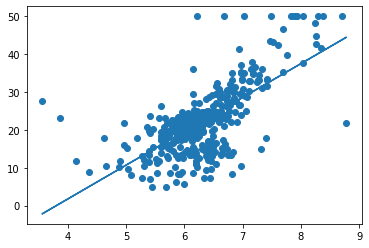

In [45]:
# Your plots here
plt.scatter(x, y)
plt.plot(x, slope*x + intercept) 

In [52]:
x1 = boston['lstat']
y = boston['medv']
slope, intercept = np.polyfit(x1, y, 1) 


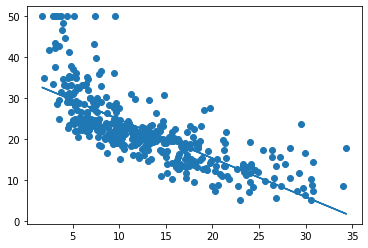

In [53]:
plt.scatter(x1, y)
plt.plot(x1, slope*x1 + intercept) 

### What do these plots tell you about the relationships between these variables and the prices of homes in Boston? Are these the relationships you expected to see in these variables?

<AxesSubplot:>

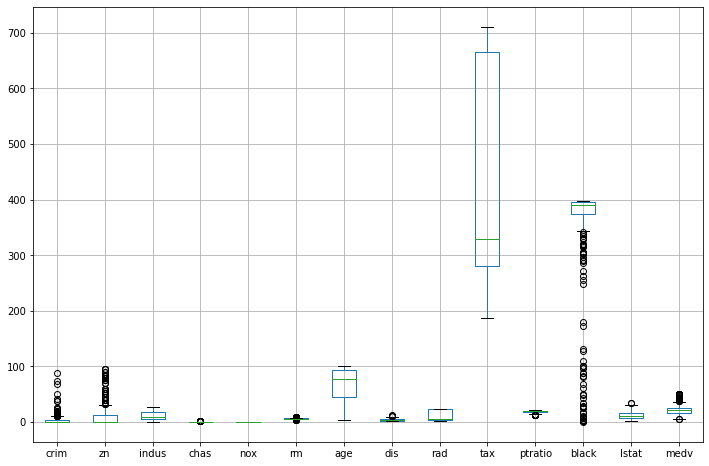

In [25]:
# Your response here
plt.figure(figsize = (12,8))
boston.boxplot()

In [ ]:
#If it is too broad, this could be divided in two model

### Make a heatmap of the remaining variables. Are there any variables that you did not consider that have very high correlations? What are they?

<AxesSubplot:>

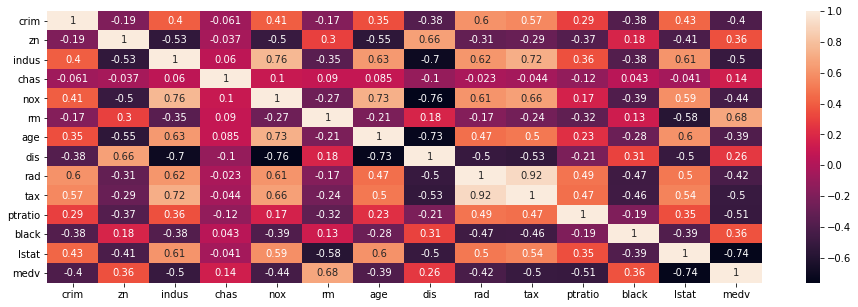

In [26]:
# Your response here

plt.figure(figsize = (16,5))
sns.heatmap(boston.corr(), annot = True)

# negative correlation: lstat
# positive correlation: rm

### Calculate Statistics
Calculate descriptive statistics for housing price. Include the minimum, maximum, mean, median, and standard deviation. 

In [54]:
# Your code here

boston.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
count,404.000000,404.000000,404.000000,404.000000,404.000000,404.00000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000
mean,3.730912,10.509901,11.189901,0.069307,0.556710,6.30145,68.601733,3.799666,9.836634,411.688119,18.444554,355.068243,12.598936,22.312376
std,8.943922,22.053733,6.814909,0.254290,0.117321,0.67583,28.066143,2.109916,8.834741,171.073553,2.150295,94.489572,6.925173,8.837019
min,0.006320,0.000000,0.460000,0.000000,0.392000,3.56100,2.900000,1.169100,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082382,0.000000,5.190000,0.000000,0.453000,5.90275,45.800000,2.087875,4.000000,281.000000,17.375000,374.710000,7.135000,17.100000
50%,0.253715,0.000000,9.795000,0.000000,0.538000,6.23050,76.600000,3.207450,5.000000,330.000000,19.000000,391.065000,11.265000,21.400000
75%,4.053158,12.500000,18.100000,0.000000,0.631000,6.62925,94.150000,5.222125,24.000000,666.000000,20.200000,396.007500,16.910000,25.000000
max,88.976200,95.000000,27.740000,1.000000,0.871000,8.78000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,34.370000,50.000000


----

## Developing a Model

### Implementation: Define a Performance Metric
What is the performance meteric with which you will determine the performance of your model? Create a function that calculates this performance metric, and then returns the score. 

In [114]:
from sklearn.metrics import r2_score

def performance_metric(y_test, ytest_predict):
    """ Calculates and returns the performance score between 
        true and predicted values based on the metric chosen. """
    # Your code here:
    return r2_score(y_test, ytest_predict)

### Implementation: Shuffle and Split Data
Split the data into the testing and training datasets. Shuffle the data as well to remove any bias in selecting the traing and test. 

In [157]:
boston_x = boston[['rm','lstat', 'crim', 'zn','indus','chas','nox','rm','age','dis','rad','tax','ptratio','black']]

In [158]:
boston_y = boston['medv']
 

In [159]:
# Your code here
from sklearn.model_selection import train_test_split
 
X_train, X_test, y_train, y_test = train_test_split(boston_x, boston_y, test_size = 0.2, random_state=42)

----

## Analyzing Model Performance
Next, we are going to build a Random Forest Regressor, and test its performance with several different parameter settings.

### Learning Curves
Lets build the different models. Set the max_depth parameter to 2, 4, 6, 8, and 10 respectively. 

In [160]:
#first attempt
from sklearn.ensemble import RandomForestRegressor
model2 = RandomForestRegressor(max_depth=2)
model2.fit(X_train,y_train)
pred_y_2 = model2.predict(X_test)


Now, plot the score for each tree on the training set and on the testing set.

In [163]:
# Five separate RFR here with the given max depths
list_depth = [2, 4, 6, 8, 10]
rf_X_train_score = []
rf_X_test_score = []
for i in list_depth:
    rf_train = RandomForestRegressor(max_depth = i , random_state=42)
    rf_train.fit(X_train, y_train)
    ytrain_predict = rf_train.predict(X_train)
    print(f'the accuracy of the RF Train with a max depth of {rf_train.max_depth} is of',performance_metric(y_train, ytrain_predict))
    rf_X_train_score.append(performance_metric(y_train, ytrain_predict))
    rf_test = RandomForestRegressor(max_depth = i , random_state=42)
    rf_test.fit(X_test, y_test)
    ytest_predict = rf_train.predict(X_test)
    print(f'the accuracy of the RF Test with a max depth of {rf_test.max_depth} is of',performance_metric(y_test, ytest_predict))
    rf_X_test_score.append(performance_metric(y_test, ytest_predict))
    print('-------------')




the accuracy of the RF Train with a max depth of 1 is of 0.6102454644292385
the accuracy of the RF Test with a max depth of 1 is of 0.42878290379875095
-------------
the accuracy of the RF Train with a max depth of 2 is of 0.7836937204706163
the accuracy of the RF Test with a max depth of 2 is of 0.606622723728132
-------------
the accuracy of the RF Train with a max depth of 4 is of 0.9195713515104403
the accuracy of the RF Test with a max depth of 4 is of 0.6755998781209523
-------------
the accuracy of the RF Train with a max depth of 6 is of 0.9548608837153106
the accuracy of the RF Test with a max depth of 6 is of 0.7076682468722718
-------------
the accuracy of the RF Train with a max depth of 8 is of 0.9687670205816796
the accuracy of the RF Test with a max depth of 8 is of 0.7188358713098922
-------------
the accuracy of the RF Train with a max depth of 10 is of 0.9735450527525522
the accuracy of the RF Test with a max depth of 10 is of 0.7136564078603334
-------------


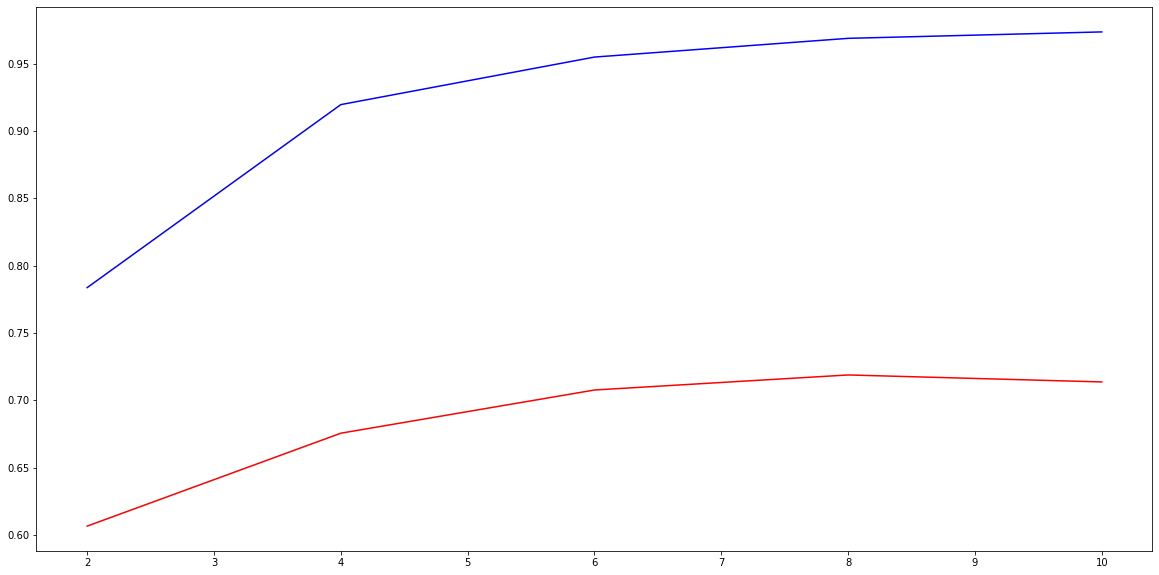

In [162]:
# Your response here
plt.figure(figsize=(20,10))

plt.plot(list_depth,rf_X_train_score, c='b',label='perf score train model')
plt.plot(list_depth,rf_X_test_score, c='r',label='perf score test model')

What do these results tell you about the effect of the depth of the trees on the performance of the model?

In [ ]:
#After maxdepth = 2 the difference accuracy of train and test seems to be bigger.

### Bias-Variance Tradeoff
When the model is trained with a maximum depth of 1, does the model suffer from high bias or from high variance? How about when the model is trained with a maximum depth of 10?

In [181]:
# Your response here



### Best-Guess Optimal Model
What is the max_depth parameter that you think would optimize the model? Run your model and explain its performance.

In [ ]:
# Your response here
#It looks like the one using maxdepth = 2 is the best as the difference between both data is the lowest

### Applicability
*In a few sentences, discuss whether the constructed model should or should not be used in a real-world setting.*  
**Hint:** Some questions to answering:
- *How relevant today is data that was collected from 1978?*
- *Are the features present in the data sufficient to describe a home?*
- *Is the model robust enough to make consistent predictions?*
- *Would data collected in an urban city like Boston be applicable in a rural city?*

In [ ]:
# Your response here